In [1]:
library(readr)
Churn_Modelling <- read_csv("C:/Users/z003e0kz/Desktop/Big Data Analytics and Management/2.Dönem/Marketing Analytics/Hands-on Exercises/W-5/Churn_Modelling.csv")
Churn_Modelling <- Churn_Modelling[-c(1:3)]
summary(Churn_Modelling)
head(Churn_Modelling)

Parsed with column specification:
cols(
  RowNumber = col_double(),
  CustomerId = col_double(),
  Surname = col_character(),
  CreditScore = col_double(),
  Geography = col_character(),
  Gender = col_character(),
  Age = col_double(),
  Tenure = col_double(),
  Balance = col_double(),
  NumOfProducts = col_double(),
  HasCrCard = col_double(),
  IsActiveMember = col_double(),
  EstimatedSalary = col_double(),
  Exited = col_double()
)


  CreditScore     Geography            Gender               Age       
 Min.   :350.0   Length:10000       Length:10000       Min.   :18.00  
 1st Qu.:584.0   Class :character   Class :character   1st Qu.:32.00  
 Median :652.0   Mode  :character   Mode  :character   Median :37.00  
 Mean   :650.5                                         Mean   :38.92  
 3rd Qu.:718.0                                         3rd Qu.:44.00  
 Max.   :850.0                                         Max.   :92.00  
     Tenure          Balance       NumOfProducts    HasCrCard     
 Min.   : 0.000   Min.   :     0   Min.   :1.00   Min.   :0.0000  
 1st Qu.: 3.000   1st Qu.:     0   1st Qu.:1.00   1st Qu.:0.0000  
 Median : 5.000   Median : 97199   Median :1.00   Median :1.0000  
 Mean   : 5.013   Mean   : 76486   Mean   :1.53   Mean   :0.7055  
 3rd Qu.: 7.000   3rd Qu.:127644   3rd Qu.:2.00   3rd Qu.:1.0000  
 Max.   :10.000   Max.   :250898   Max.   :4.00   Max.   :1.0000  
 IsActiveMember   EstimatedSalary 

CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
619,France,Female,42,2,0.00,1,1,1,101348.88,1
608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
502,France,Female,42,8,159660.80,3,1,0,113931.57,1
699,France,Female,39,1,0.00,2,0,0,93826.63,0
850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [2]:
library(plyr)
Churn_Modelling$Geography <- revalue(Churn_Modelling$Geography, c("France"=0))
Churn_Modelling$Geography <- revalue(Churn_Modelling$Geography, c("Spain"=1))
Churn_Modelling$Geography <- revalue(Churn_Modelling$Geography, c("Germany"=2))
Churn_Modelling$Gender <- revalue(Churn_Modelling$Geography, c("Female"=0))
Churn_Modelling$Gender <- revalue(Churn_Modelling$Geography, c("Male"=1))
head(Churn_Modelling)
Churn_Modelling$Geography <- as.numeric(Churn_Modelling$Geography)
Churn_Modelling$Gender <- as.numeric(Churn_Modelling$Gender)
typeof(Churn_Modelling$Geography)
typeof(Churn_Modelling$Gender)
head(Churn_Modelling)

The following `from` values were not present in `x`: Female
The following `from` values were not present in `x`: Male


CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
619,0,0,42,2,0.00,1,1,1,101348.88,1
608,1,1,41,1,83807.86,1,0,1,112542.58,0
502,0,0,42,8,159660.80,3,1,0,113931.57,1
699,0,0,39,1,0.00,2,0,0,93826.63,0
850,1,1,43,2,125510.82,1,1,1,79084.10,0
645,1,1,44,8,113755.78,2,1,0,149756.71,1


[1] "double"

[1] "double"

CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
619,0,0,42,2,0.00,1,1,1,101348.88,1
608,1,1,41,1,83807.86,1,0,1,112542.58,0
502,0,0,42,8,159660.80,3,1,0,113931.57,1
699,0,0,39,1,0.00,2,0,0,93826.63,0
850,1,1,43,2,125510.82,1,1,1,79084.10,0
645,1,1,44,8,113755.78,2,1,0,149756.71,1


In [3]:
#train and test data split
library("caTools")
set.seed(123)
split = sample.split(Churn_Modelling$Exited, SplitRatio = 0.7)
training_set <- subset(Churn_Modelling, split == TRUE)
test_set <- subset(Churn_Modelling, split == FALSE)

In [8]:
# Fitting Random Forest Classification to the Training set
#install.packages("randomForest")# install.packages('randomForest')
library(randomForest)
set.seed(123)
classifier = randomForest(as.factor(Exited) ~ ., data = training_set, importance = TRUE, ntree = 500)
classifier
summary(classifier)

Warning message:
"package 'randomForest' was built under R version 3.5.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.



Call:
 randomForest(formula = as.factor(Exited) ~ ., data = training_set,      importance = TRUE, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 13.81%
Confusion matrix:
     0   1 class.error
0 5367 207  0.03713671
1  760 666  0.53295933

                Length Class  Mode     
call                5  -none- call     
type                1  -none- character
predicted        7000  factor numeric  
err.rate         1500  -none- numeric  
confusion           6  -none- numeric  
votes           14000  matrix numeric  
oob.times        7000  -none- numeric  
classes             2  -none- character
importance         40  -none- numeric  
importanceSD       30  -none- numeric  
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y                7000  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

ERROR: Error in xy.coords(x, y, recycle = TRUE, setLab = FALSE): 'x' is a list, but does not have components 'x' and 'y'


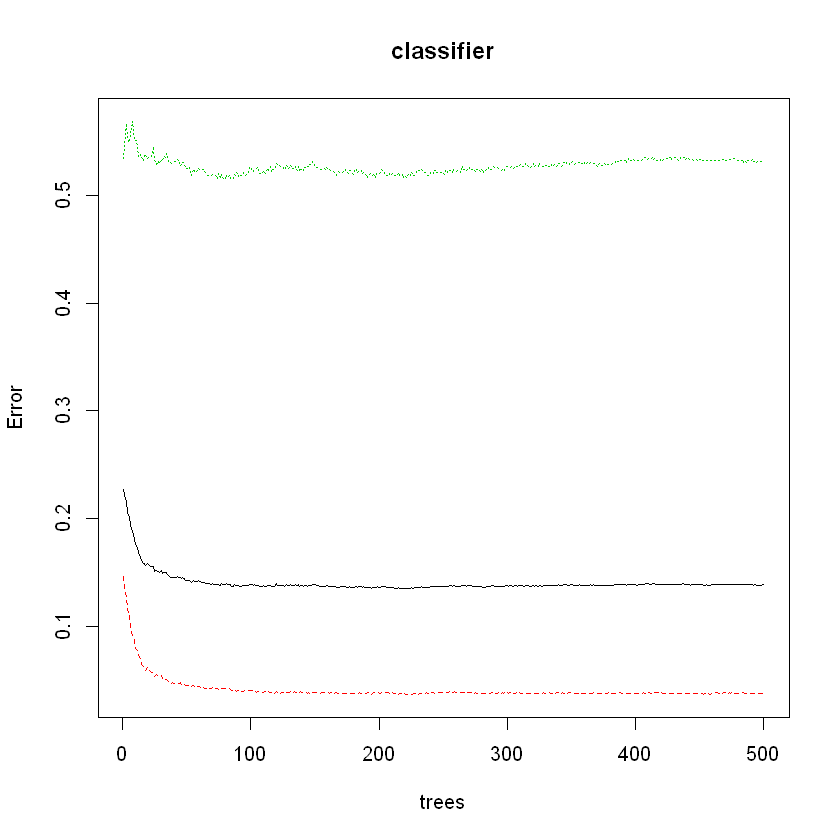

In [9]:
# plot the trained tree 
plot(classifier)
text(classifier,pretty=0)

In [10]:
#Test the predictions of the trained model
testpredictions = predict(classifier, test_set, type ="class")

In [11]:
#Find the accuracy of the model
cm =table(testpredictions, test_set$Exited)

#Display the accuracy of the model in test data
accuracy = (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
print(accuracy)


[1] 0.8653333
